# **MNIST Report**
###  **Artifical Intelligence: Coursework 1 | Kamal Keita-Jones**







Our aim is to undergo a systematic investigation into the best model for our chosen dataset. The MNIST database of handwritten digits.

### **Defining the problem and chosen dataset**

The input data for the investigation is from the MNIST database of handwritten digits. Specifically,  70,000 grayscale images (28 x 28 pixels). The problem we are trying to solve is that each of the handwritten digits are to be classified into 10 exclusive categories. Classes 0 to 9. In this investigation, we aim to assess which model is the best for this branch of image classification, Multiclass Classification.

We are then hypothesising that
- 1) the labels can be predicted using the input images (H1).
- And 2) that our input data samples have sufficient patterns for our Neural Network, in order to learn correct output predictions H2)

These two hypothesises (H1 and H2) are to be proven throughout our investigation. Changes will be made, if necessary, to ensure the input data provides predictable patterns for our neural network to learn from and successfully classify the given images.




### **Processing Data**

The 2D images for each sample must undergo a process of reshaping in order to be acceptable to our network. Each 28x28 pixel 2D image is reshaped into a vector (1D array). This is then scaled down between 0 and 1, [0, 1] as floating-point numbers.

In order to be acceptable to our network, the labels for each digit must also be vectorised, lists of integers cannot be passed onto the network. This is achieved by categorical encoding (using the `to_categorical` python utlilty library).

Vectors are “zero-filled” and the only nonzero element corresponds to the category each image belongs to.

`'7' as a one-hot vector: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] `

As you can see above 7 as a label is categorically (or ‘one-hot) encoded to the vector with the only nonzero element being in the 7th position of the array.


In [ ]:
# load data
from tensorflow. keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# preprocess
# vectorise data samples
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# vectorise labels using to_categorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



11501568/11490434 [==============================] - 0s 0us/step


### **Developing a model that achieves statistical power**

We established that our input data and our target data are acceptable to our network. In the form of a tensor, multi-dimensional numpy array, allowing us to begin training our model.

In the MNIST problem, each handwritten digit image belongs to one of 10 classesr. Meaning the random baseline we are aiming to beat with our model is 0.1 Achieving a higher accuracy than 10% proves hypothesises H1 and H2, that:
- Our outputs can be predicted from our inputs
- and there is sufficient information in our data for there to be relationship between the input data and our output data to be learnt by our model. (DLWP pg 113)

When proving this key choices were then made regarding the architecture of our initial working network. Deciding which configurations of these attributes suit our particular problem:

- Last-layer activation
- Loss function
- Optimiser configuration

The last- layer of my neural network has activation of ‘10-way softmax’. This is because the results of my network need to be constrained to a 10-dimensional vector in order to be useful. And softmax outputs a probability distribution of 10 nonnegative values that sum to 1. Having a probability that the sample belongs to each class. The highest probability will be the predicted label for that sample.  

In addition, the loss function selected is categorical cross-entropy as it is common practice for Multiclass single-label classification problems. The loss function quantifies how far the prediction is from the target classification.

Categorical cross-entropy works well with categorical encoding due to its ability to reduce the discrepancy between the probability distribution outputted by the network and the actual distribution between classes.

In conclusion, the optimisation scheme for the neural network was ‘RMSprop’ with its default learning rate and momentum. This has been selected because it is common with multiclass classification. The optimiser is what makes the appropriate changes to parameters in the ‘training loop’ using the provided metric to report on development.



The `validation_split` parameter, requires a floating point number between 0 and 1. This was used by keras as the fraction of training data to be set aside as validation data, approximately 16%.

50,000 training images and 10,000 validation images not to be seen by the model.

The `network.fit()` method trains the model we have built and returns a history object.

#### Model #1: Achieving statistical power

In [ ]:
# build Model 1
from tensorflow.keras import models, layers
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 6s 15ms/step - loss: 0.2788 - accuracy: 0.9185 - val_loss: 0.1484 - val_accuracy: 0.9575
Epoch 2/20
391/391 [==============================] - 5s 14ms/step - loss: 0.1165 - accuracy: 0.9653 - val_loss: 0.0988 - val_accuracy: 0.9707
Epoch 3/20
391/391 [==============================] - 5s 13ms/step - loss: 0.0766 - accuracy: 0.9771 - val_loss: 0.0826 - val_accuracy: 0.9769
Epoch 4/20
391/

`history.history` returns a python dictionary, key value pairs for the keys shown below, storing metrics recorded during the initial models training.

Here I am storing this dictionary in a new variable, `history_dict`,  to be refered to when plotting in result analysis.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Using the matplotlib library, I will plot the training and validation loss and accuracy throughout this initial model training. With the aim of beating the basline accuracy of 0.10 and proving our hypothesises.

Function I created to display the training and validation loss. (ref DLWP pg. 75)

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the loss of the lastest network
def plot_loss():

  history_dict = history.history

  # store values for each neccessary key in the dictionary
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  accuracy_values = history_dict['accuracy']

  epochs = range(1, len(accuracy_values) + 1)

  # format strings converter
  blue_dotted = 'ob'
  solid_blue_lines = '-b'

  # plot training loss
  plt.plot(epochs, loss_values, blue_dotted, label = 'Training loss')

  # plot validation loss
  plt.plot(epochs, val_loss_values, solid_blue_lines, label = 'Validation loss')

  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()



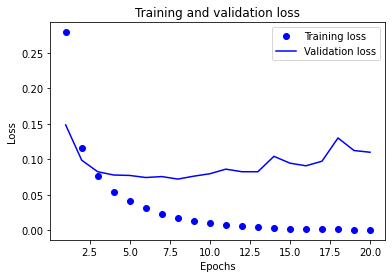

In [ ]:
plot_loss()

Function created to display the training and validation accuracy. (DLWP pg. 75)

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the accuracy of the lastest network
def plot_acc():

  # function to clear current figure
  plt.clf()

  history_dict = history.history

  # store values for each neccessary key in the dictionary
  accuracy_values = history_dict['accuracy']
  val_accuracy_values = history_dict['val_accuracy']

  epochs = range(1, len(accuracy_values) + 1)

  # format strings converter
  blue_dotted = 'ob'
  solid_blue_lines = '-b'

  # plot training accuracy
  plt.plot(epochs, accuracy_values, blue_dotted, label = 'Training accuracy')

  # plot validation accuracy
  plt.plot(epochs, val_accuracy_values, solid_blue_lines, label = 'Validation accuracy')

  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()


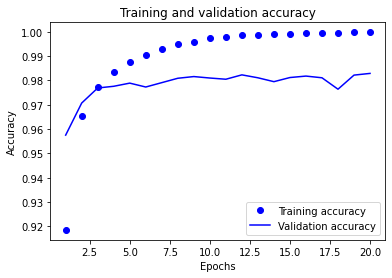

In [ ]:
plot_acc()

The training loss decreased with every epoch and the training accuracy increased with every epoch. A reuslt of the training loop.

We see a peak at the 8th epoch, accuracy is approximately 98% and loss is 0.0723 (2 d.p).

Afterwards the validation loss and accruacy begins to worsen when compared to the training data. Here our model had over specialised to the training data.

Our model peaked at 98% accuracy, meaning we have been successful in developing a model that surpasses the baseline accuracy of 10%, achieving *statistical power*.

This has proven our hypothesises that outputs can be predicted from our inputs, that they have memorisable patterns that can be learnt by our model.

Below is a table displaying these findings of our networks inital training.


|   Model # | Number of layers| Number of units| Result |
|--------   | -----------     | -----------    |---------|
| 1         |         2       | 512, 10 | achieved a high accuracy, circa 98%. Best loss was 0.0723 at the 8th epoch.  slight overfitting occured afterwards.

Below are functions created to find the maximum accuracy and minimum loss for a given dictonary key using the Numpy methods `argmax()` and `argmin()`.

Further improvements to the code could include error handling for the `key` parameter.

In [ ]:
import numpy as np

def get_largest_value(key):
    largest_value_index = np.argmax(history_dict[key])
    return history_dict[key][largest_value_index]

get_largest_value('val_accuracy')

0.9829016923904419

In [ ]:
def get_smallest_value(key):
  smallest_value_index = np.argmin(history_dict[key])
  return history_dict[key][smallest_value_index]


get_smallest_value('val_loss')

0.07227687537670135

### **Scaling up: developing a model that overfits**

We had proven that our model is capable of achieving statistical power, now we must prove that our network has a sufficent architecture to handle the classification task at hand.

From the inital traning of our model, we learnt that after 8 epochs, slight overfitting occured. Starting with 20 epochs and 512 units in the first layer provided us with information to prove we have the computational power for this task.

However, we cannot be sure of this with only one model consisting of two layers, we will try another architecture to hopefully overfit a greater extent to prove we have the power to solve this task.

The number of layers will increase, we will add an additional hidden layer.

After finding our model sufficently powerful we can begin regularising our model and tuning hyperparameters to neither underfit or overfit.


#### Model #2: Developing a model that overfits

In [ ]:
# Build Model #2
from tensorflow.keras import models, layers
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
# additional hidden layer
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 9s 20ms/step - loss: 0.2415 - accuracy: 0.9242 - val_loss: 0.1181 - val_accuracy: 0.9657
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0890 - accuracy: 0.9724 - val_loss: 0.0922 - val_accuracy: 0.9716
Epoch 3/20
391/391 [======

Plotting the loss of the scaled-up model

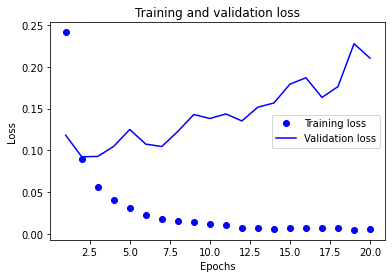

In [ ]:
plot_loss()

Plotting the accuracy of the scaled-up model

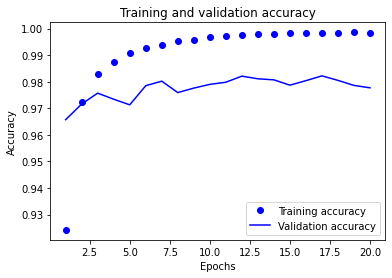

In [ ]:
plot_acc()

When scaling up our model we were able to see much more severe overfitting in our validation loss compared to Model #1. We have proven we have the optimisation capabilites for this problem.

However, our overall goal is to find the best model, that is most optimised and most general. From how servere the overfitting was in this model we have learnt that having more layers is not effective in terms of finding the best architecture for this problem.

Below is the table of findings from Model #2 compared to that of Model #3.




| Model #   | Number of layers | Number of units/layer | Results
| ----------| -----------| -------- | -------- |  
| 1      |    2    |512, 10 | achieved a high accuracy, circa 98%. Best loss was 0.0723 at the 8th epoch.  slight overfitting occured afterwards. |
| 2   | 3        | 512, 512, 10 | best accuracy, circa 98%. Best loss, circa 0.0922. Began overfitting almost imediately, drastically step incline.

### **Regularising the model and tuning hyperparameters**

To  fight the problem of overfitting, reaching our optimum model, we will implement models with regularisation and tune hyperparameters.

For our model(s) and the problem at hand, the MNIST handwritten digits, the following hyperparameters will be adjusted repeatidly:

*   The number of units per layer
*   The learning rates of the given optimiser
*   The activation function configuration

We will evaluate results, investigating which architecture  yields the highest validation accuracy, optimum, not underfitting or overfitting.

The proven optimal network architecutre will then be tested on the compleletely unseen test data and we will record the test accuracy and our findings.




As we are currently overfitting I will start by using Model #1 and reducing the number of units per layer.

I believe the task at hand does not require the amount of learnable paramaters afforded previously. The model has the memorisation capacity to learn highly specific patterns on the training data, including noise that is not neccessary in making correct prediction **generally**. This would explain the drastic overfitting in the validation loss when trying to apply these patterns to unseen data.

I hope to reduce the number of units to an amount does not have the memorisation capacity to overfit. However, it must have enough memorisation capacity to learn meaningful patterns and not underift.

In the following model the input layers number of units will be changed from 512 to 256.



#### Model #3: Less units per layer (256)

In [ ]:
# build Model #3
from tensorflow.keras import models, layers
network = models.Sequential()

# changed number of units (input layer)
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 0.3190 - accuracy: 0.9095 - val_loss: 0.1773 - val_accuracy: 0.9537
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 0.1407 - accuracy: 0.9597 - val_loss: 0.1226 - val_accuracy: 0.9656
Epoch 3/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0956 - accuracy: 0.9723 - val_loss: 0.0968 - val_accuracy: 0.9724
Epoch 4/20
391/391

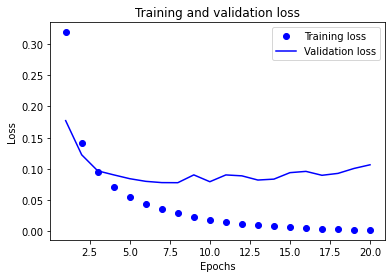

In [ ]:
plot_loss()

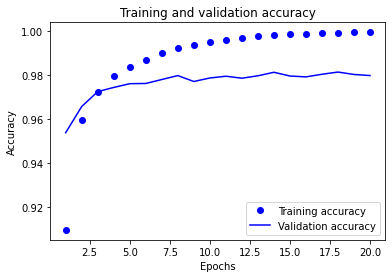

In [ ]:
plot_acc()

We have found that reducing the number of units per layer has provided us with a decrease in overfitting when compared to Model #2. The best accuracy is 98% and the best loss is 0.0778.

The validation loss is much closer to the training loss and the overfitting that is present is not as drastic.

 When using the `model.summary()` method, we can see that Model #2 had a total of 669,706 trainable paramaters, where Model #3, that overfits less, had 203,530. This may be the reason for this difference in overfitting performance.

 Below is a table recording our results, with the added column to compare the amount of trainable parameters.

| Model #   | Number of layers | Number of units/layer | Trainable parameters | Results  
| ----------| -----------| -------- | -------- | ------- |  
| 1      |    2    | 512, 10 |407,050 | achieved a high accuracy, circa 98%. Best loss was 0.0723 at the 8th epoch.  slight overfitting occured afterwards. |
| 2   | 3        | 669,706 | 512, 512, 10 | best accuracy, circa 98%. Best loss, circa 0.0922. Began overfitting almost imediately, drastically step incline.
|3 | 2 | 256, 10 | 203,530 | Best accuracy, circa 98% Best loss, circa 0.0778. Very slight overfitting experienced.

To further investigate this balance of memorisation capacity, we will change the number of units to 128. We will investigate if Model #3 (256) is the best model for our problem or not.

#### Model #4: Less units per layer (128)

In [ ]:
# build Model #4
from tensorflow.keras import models, layers
network = models.Sequential()

# changed number of units (input layer)
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.3489 - accuracy: 0.9047 - val_loss: 0.1941 - val_accuracy: 0.9486
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.1708 - accuracy: 0.9500 - val_loss: 0.1426 - val_accuracy: 0.9605
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.1236 - accuracy: 0.9646 - val_loss: 0.1190 - val_accuracy: 0.9660
Epoch 4/20
391/39

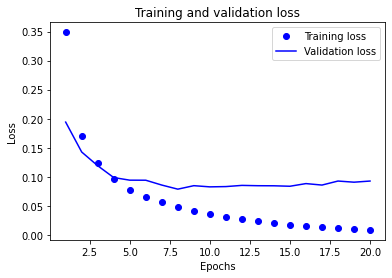

In [ ]:
plot_loss()

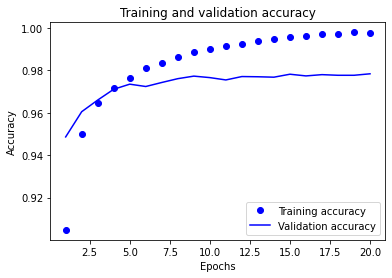

In [ ]:
plot_acc()

With 128 units per layer we are seeing even less trainable parameters and potenially getting close to optimal number of units before we begin underfitting. We do not want to restrict our networks ability to memorise patterns completely.

We will tune the number of paramaters one more time to confirm our optimal number of units.

Below is our continued comparison of networks.

| Model #   | Number of layers | Number of units/layer | Trainable parameters | Results  
| ----------| -----------| -------- | -------- | ------- |  
| 1      |    2    | 512, 10 |407,050 |  Best accurarcy, circa 98%. Best loss was 0.0723 at the 8th epoch.  slight overfitting occured afterwards. |
| 2   | 3        | 669,706 | 512, 512, 10 | best accuracy, circa 98%. Best loss, circa 0.0922. Began overfitting almost imediately, drastically step incline.
|3 | 2 | 256, 10 | 203,530 | Best accuracy, circa 98% Best loss, circa 0.0778. After 8th epoch very slight overfitting experienced.
|4 | 2 | 128, 10 | 101,770 | Best accuracy, circa 98%. Best loss, circa 0.0786. Minimal overfitting experienced.

Our final experiment on the hyperparameter: number of units, will have a network with 64 units in its input layer. I expect to see the model either underfit as it is beginging to have a minimal number of traninable units to learn patterns with.

#### Model #5: Less units per layer (64)

In [ ]:
# build Model #5
from tensorflow.keras import models, layers
network = models.Sequential()

# changed number of units (input layer)
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 0.4269 - accuracy: 0.8844 - val_loss: 0.2409 - val_accuracy: 0.9330
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.2246 - accuracy: 0.9361 - val_loss: 0.1844 - val_accuracy: 0.9506
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 0.1749 - accuracy: 0.9502 - val_loss: 0.1564 - val_accuracy: 0.9561
Epoch 4/20
391/391 

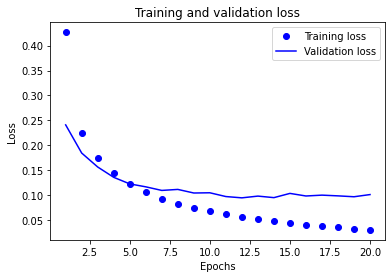

In [ ]:
plot_loss()

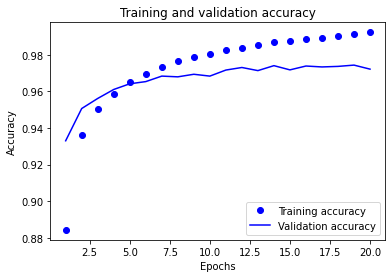

In [ ]:
plot_acc()

The key takeaways are that the accuracy has decreased from its constant 98% throughout models to 97%. The peak Loss also increases to 0.0949. A very slight change, But this could be an indicator that we are losing the ability to memorise patterns with this model to the same level.

The best model to refer to is Model #4 for the optimum configuration for this hyperparameter. Model #4 has a lower loss than Model #5 and still overfits minimally. As seen in the table below

| Model #   | Number of layers | Number of units/layer | Trainable parameters | Results  
| ----------| -----------| -------- | -------- | ------- |  
| 1      |    2    | 512, 10 |407,050 |  Best accurarcy, circa 98%. Best loss was 0.0723 at the 8th epoch.  slight overfitting occured afterwards. |
| 2   | 3        | 669,706 | 512, 512, 10 | Best accuracy, circa 98%. Best loss, circa 0.0922. Began overfitting almost imediately, drastically step incline.
|3 | 2 | 256, 10 | 203,530 | Best accuracy, circa 98% Best loss, circa 0.0778. After 8th epoch very slight overfitting experienced.
|4 | 2 | 128, 10 | 101,770 | Best accuracy, circa 98%. Best loss, circa 0.0786. Minimal overfitting experienced.
|5 | 2 | 64, 10 | 50,890 | Best Accuracy, circa 78%. Best loss circa, 0.0949. Slightly lower accuracy, next to no overfitting

The next hyperpararmeter to experiment with is the learning rate of the optimiser, RMSProp. The learning rate changes how many steps it takes to go down the gradient of loss values.

DWLP recommends us to use the default learning rate for RMSProp, which is 0.001 [`learning_rate = 0.001`]. We will experiment if this is the best learnig rate by comparing Model #4 (128), which uses the default learning rate of 0.01. Using the results from this experiment we will determine what interval to use next.

A learning rate that is too large will take too great steps and miss potential minimums in the loss gradient. However, when a learning rate that is too small. It will take a longer amount of time to be executed. We will investigate into this balance of the learning_rate.

#### Model #6: Adjusting Learning rate (0.01)

In [ ]:
# build Model #6
# import optimizers module
from tensorflow.keras import models, layers, optimizers
network = models.Sequential()

# changed number of units (input layer)
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               100480    
                                                                 
 dense_44 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 0.3604 - accuracy: 0.9020 - val_loss: 0.1939 - val_accuracy: 0.9467
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.1708 - accuracy: 0.9508 - val_loss: 0.1397 - val_accuracy: 0.9609
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.1213 - accuracy: 0.9647 - val_loss: 0.1101 - val_accuracy: 0.9672
Epoch 4/20
391/3

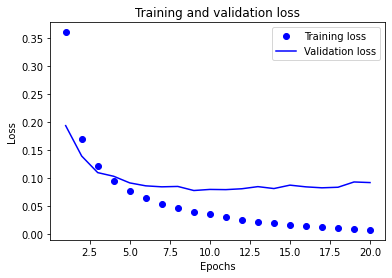

In [ ]:
plot_loss()

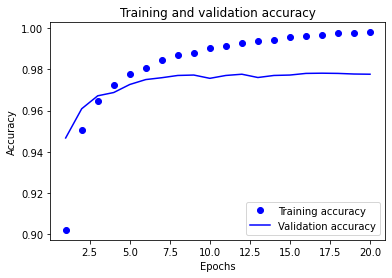

In [ ]:
plot_acc()

Adjusting the learning rate has not resulted in a peak in overall validation loss or accruacy, meaning the model with the default learning rate is proving itself to be the most optimum.

| Model #   | Number of layers | Number of units/layer | Learning rate | Results  |
| ----------| -----------| -------- | -------- | ------- |
|4 | 2 | 128, 10 | default (0.001) |Best accuracy, circa 98%. Best loss, circa 0.0786. Minimal overfitting experienced.
| 6 | 2 | 128, 10 | 0.01 | Best accuracy, circa 98%. Best loss circa 0.0782

To substantiate that the default learning rate is best option for the final model, I will further my experiment on learning rates. This time the learning rate will be 0.005 instead of 0.1. Incase 0.01 was too large of an interval.

#### Model #7: Adjusting learning rate (0.005)

In [ ]:
# build Model #7
# import optimizers module
from tensorflow.keras import models, layers, optimizers
network = models.Sequential()

network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

# learning rate able to changed
network.compile(optimizer=optimizers.RMSprop(learning_rate=0.005),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               100480    
                                                                 
 dense_40 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.2631 - accuracy: 0.9184 - val_loss: 0.1158 - val_accuracy: 0.9665
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.1089 - accuracy: 0.9679 - val_loss: 0.1008 - val_accuracy: 0.9712
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0759 - accuracy: 0.9771 - val_loss: 0.0963 - val_accuracy: 0.9739
Epoch 4/20
391/39

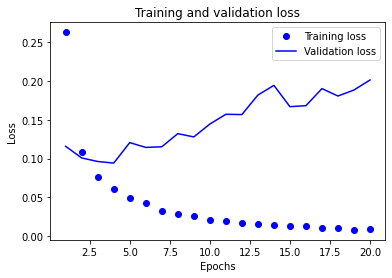

In [ ]:
plot_loss()

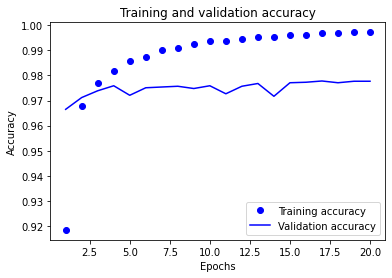

In [ ]:
plot_acc()

Using the rsults from this table I will be confident using the default learning rate for the RMSProp optimiser. When using the slightly higher learing rate in Model #7 of 0.005, there was a great overfitting to the traning data.

| Model #   | Number of layers | Number of units/layer | Learning rate | Results  |
| ----------| -----------| -------- | -------- | ------- |
|4 | 2 | 128, 10 | default (0.001) |Best accuracy, circa 98%. Best loss, circa 0.0786. Minimal overfitting experienced.
| 6 | 2 | 128, 10 | 0.01 | Best accuracy, circa 98%. Best loss circa 0.0782. Again, minimal overfitted resources.
|7 | 2 | 128, 10 | 0.005 | best acc is circa 98% and the best loss is 0.0942. Severe overfitting after 3rd epoch occured.

#### Model #8: Changing activation function (linear)

In [ ]:
# build Model #8

from tensorflow.keras import models, layers
network = models.Sequential()

# changed activation function
network.add(layers.Dense(128, activation='linear', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 128)               100480    
                                                                 
 dense_42 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.4062 - accuracy: 0.8850 - val_loss: 0.2858 - val_accuracy: 0.9213
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.3021 - accuracy: 0.9146 - val_loss: 0.2995 - val_accuracy: 0.9187
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.2889 - accuracy: 0.9201 - val_loss: 0.2677 - val_accuracy: 0.9285
Epoch 4/20
391/39

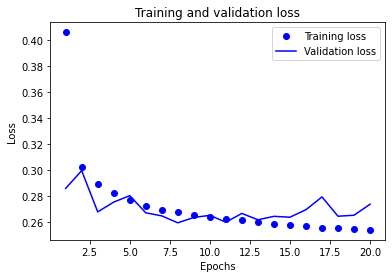

In [ ]:
plot_loss()

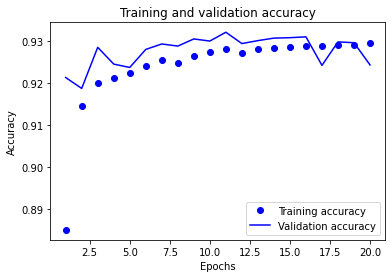

In [ ]:
plot_acc()

Linear proves not to be a suitable activation funtion for our problem. We see a decrease in validation accuracy. From our average 98% to 93%. Clearly, the Relu activation function is more suited to the problem at hand.

Although there is less difference between validation and training loss, the validation loss is best at 0.2593, which is much higher than the relu activated networks.

The table below shows our current comparisons.

| Model #   | Number of layers | Number of units/layer |  Activation |Results  |
| ----------| -----------| -------- | -------- | ------- |
|4 | 2 | 128, 10 | relu |Best accuracy, circa 98%. Best loss, circa 0.0786. Minimal overfitting experienced.
| 8 | 2 | 128, 10 | linear | Best accuracy, circa 93%. Best loss circa 0.2593. Next to no overfitting.

The next activation configuaration to experiment with is to use the 'tanh' function as the output layer activation instead of softmax. We had thought that softmax was the best activation for this unique problem, but here is an oppurtunity for this to be proven or disproven.



#### Model #9: Changing activation function (tanh)

In [ ]:
# build Model #9

from tensorflow.keras import models, layers
network = models.Sequential()

# changed activation
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='tanh'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128,
                      validation_split = 0.166666666667)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 9.0174 - accuracy: 0.1970 - val_loss: 10.3315 - val_accuracy: 0.1283
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 8.6720 - accuracy: 0.1818 - val_loss: 8.0308 - val_accuracy: 0.1937
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 8.5927 - accuracy: 0.1808 - val_loss: 8.7093 - val_accuracy: 0.1734
Epoch 4/20
391/39

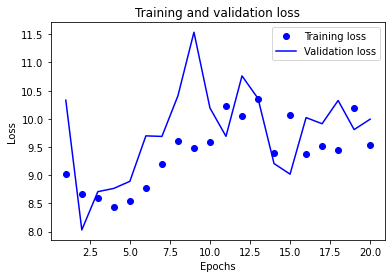

In [ ]:
plot_loss()

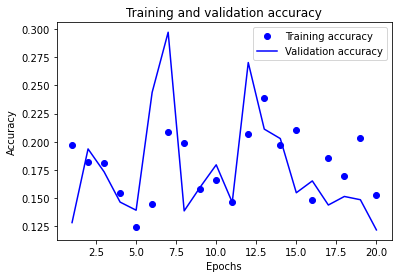

In [ ]:
plot_acc()

Here we have proven that the best activation for the input layers of our network is relu. Linear and Tanh especially cannot effectively map the inputs to targets.

| Model #   | Activation |  Results  |
| ----------| -----------| --------   |
|8          | linear     |Best accuracy,  98%. Best loss, circa 0.0786. Minimal overfitting experienced. |
| 9 | tanh | Best accuracy, circa 27%. Best loss circa 8.0308

We have explored the tuning of our hyperparameters, I will now build our best attainted model and train on our complete traning set, no validation set.

We will evaluate this on our test set.

#### Model #10: Training Optimal Model

In [ ]:
# build Model #10

from tensorflow.keras import models, layers
network = models.Sequential()

network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# display network capactiy
network.summary()

# train
history = network.fit(train_images,
                      train_labels,
                      epochs=20,
                      batch_size=128)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.3405 - accuracy: 0.9069
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1599 - accuracy: 0.9539
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1131 - accuracy: 0.9671
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0875 - accuracy: 0.9742
Epoch 5/20
469/469 [========================

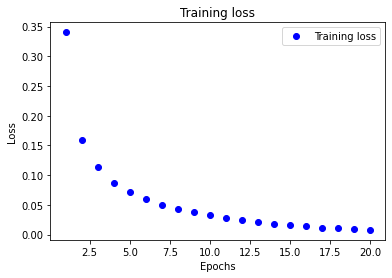

In [ ]:
history_dict = history.history

# store values for each neccessary key in the dictionary
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']

epochs = range(1, len(accuracy_values) + 1)

# format strings converter
blue_dotted = 'ob'
solid_blue_lines = '-b'

# plot training loss
plt.plot(epochs, loss_values, blue_dotted, label = 'Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

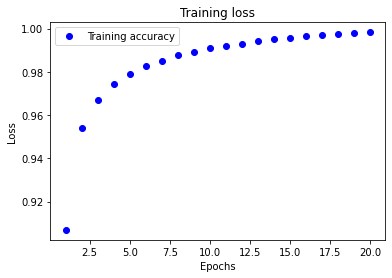

In [ ]:
# function to clear current figure
plt.clf()

history_dict = history.history

# store values for each neccessary key in the dictionary
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']

epochs = range(1, len(accuracy_values) + 1)

# format strings converter
blue_dotted = 'ob'
solid_blue_lines = '-b'

# plot training loss
plt.plot(epochs, accuracy_values, blue_dotted, label = 'Training accuracy')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9793


[0.0803743302822113, 0.9793000221252441]

### Conclusions

We developed a model with 98% accuracy in classifing handwritten digits. With a loss of 0.0804